**IMPORTING LIBRARIES**

In [ ]:
import numpy as np                          #importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn as ib
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

**LOADING THE DATASET**

In [ ]:
df = pd.read_csv("strokedata.csv")          #loading the dataset
print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [ ]:
df.shape                 #giving rows and columns

(5110, 12)

In [ ]:
df.info()                #showing the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe()                  #mathematical description of the dataset

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
print(df.isna().sum())            #finding the count of not available values in the dataset

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<Axes: >

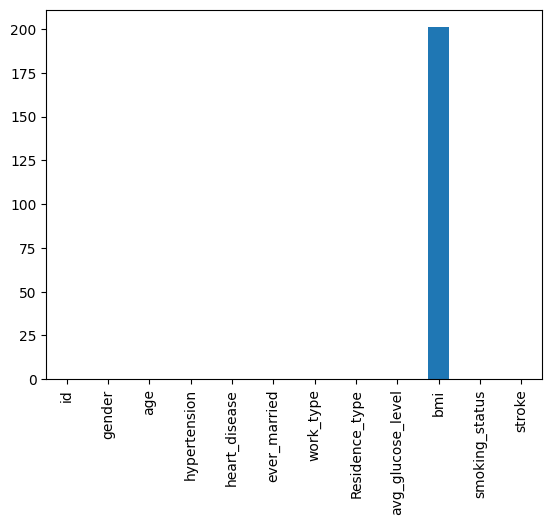

In [ ]:
df.isna().sum().plot.bar()            #plotting a horizontal bargraph for the count of not available values

In [ ]:
df.columns                 #printing the columns of the dataset

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

**DATA VISUALISATIONS**

In [ ]:
df['gender'].value_counts()          # separating the gender[FEMALE, MALE, OTHERS] into categories and displaying the count values

,count
gender,
Female,2994
Male,2115
Other,1


<Axes: xlabel='gender'>

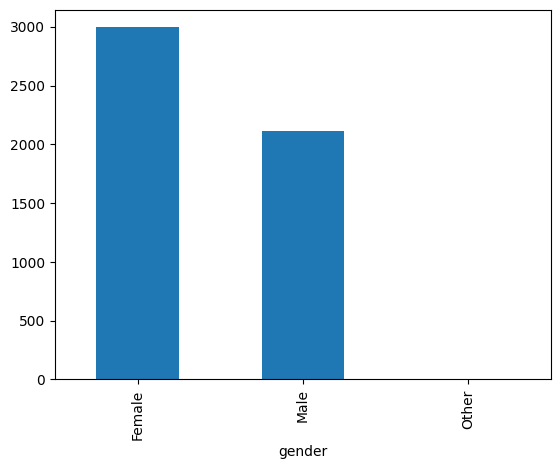

In [ ]:
df['gender'].value_counts().plot(kind="bar")

In [ ]:
df['gender'] = df['gender'].replace('Other','Female')
df['gender'].value_counts()

,count
gender,
Female,2995
Male,2115


<Axes: xlabel='gender'>

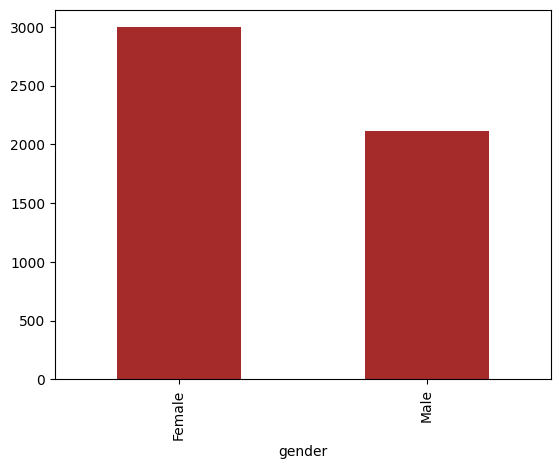

In [ ]:
df['gender'].value_counts().plot(kind="bar",color = "BROWN")

In [ ]:
df['hypertension'].value_counts()        # separating the hypertension into categories[YES, NO] and displaying the count values

,count
hypertension,
0,4612
1,498


<Axes: xlabel='hypertension'>

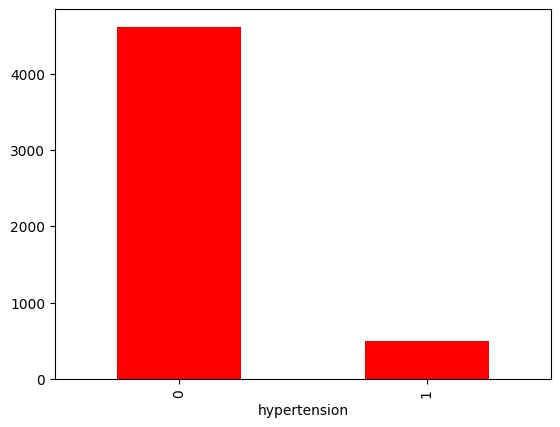

In [ ]:
df['hypertension'].value_counts().plot(kind="bar",color = "red")

In [ ]:
df['heart_disease'].value_counts()      # separating the heart_disease into categories[YES - 1, NO - 0] and displaying the count values

,count
heart_disease,
0,4834
1,276


<Axes: xlabel='heart_disease'>

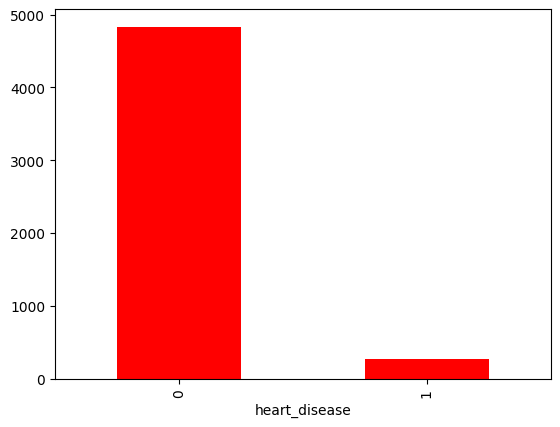

In [ ]:
df['heart_disease'].value_counts().plot(kind="bar",color = "red")

In [ ]:
df['ever_married'].value_counts()   # separating the ever married into categories[YES, NO] and displaying the count values

,count
ever_married,
Yes,3353
No,1757


<Axes: xlabel='ever_married'>

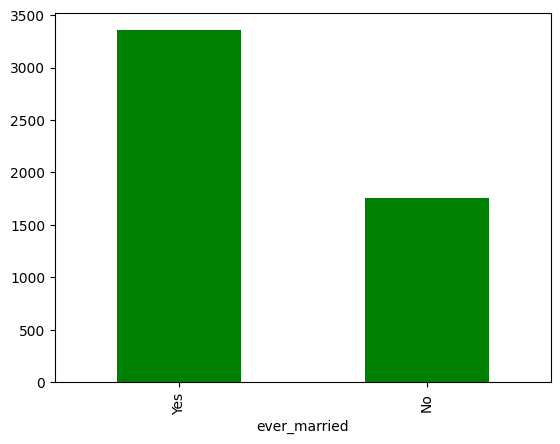

In [ ]:
df['ever_married'].value_counts().plot(kind="bar",color = "green")

In [ ]:
df['Residence_type'].value_counts()      # separating the residence type into categories[URBAN, RURAL] and displaying the count values

,count
Residence_type,
Urban,2596
Rural,2514


<Axes: xlabel='Residence_type'>

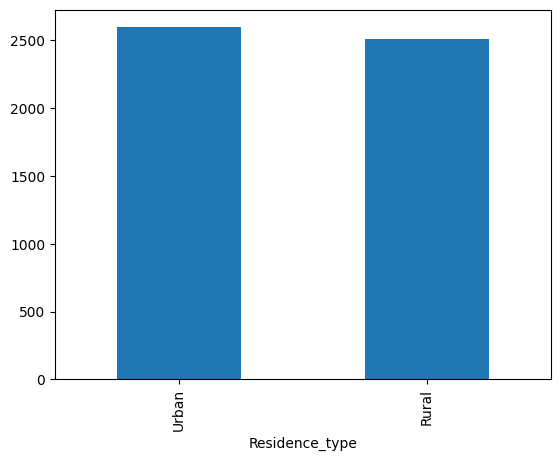

In [ ]:
df['Residence_type'].value_counts().plot(kind="bar")

In [ ]:
df['work_type'].value_counts() # separating the work type into categories[Private, self-employed, children, government job, never worked]
#and displaying the count values

,count
work_type,
Private,2925
Self-employed,819
children,687
Govt_job,657
Never_worked,22


<Axes: ylabel='count'>

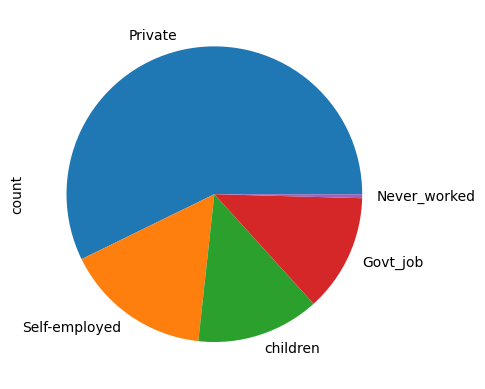

In [ ]:
df['work_type'].value_counts().plot(kind="pie")

<Axes: ylabel='Frequency'>

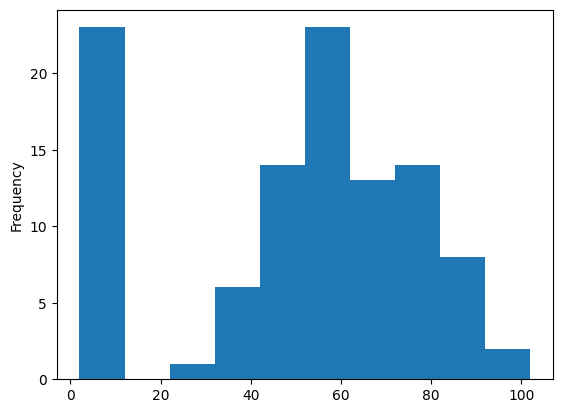

In [ ]:
df['age'].value_counts().plot(kind="hist")

In [ ]:
df['smoking_status'].value_counts() # separating the smoking status into categories[formerly status, never smoked, smoking, smoking status unknown]
# and displaying the count values

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


<Axes: xlabel='smoking_status'>

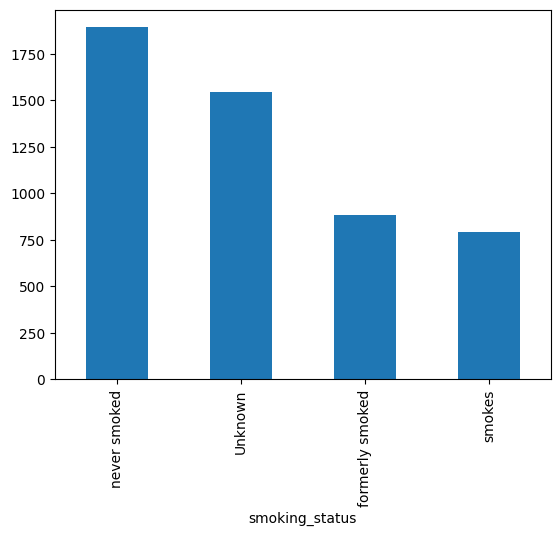

In [ ]:
df['smoking_status'].value_counts().plot(kind="bar")

In [ ]:
df['stroke'].value_counts()    # separating the stroke into categories[1 - YES, 0 - NO] and displaying the count values

,count
stroke,
0,4861
1,249


<Axes: xlabel='stroke'>

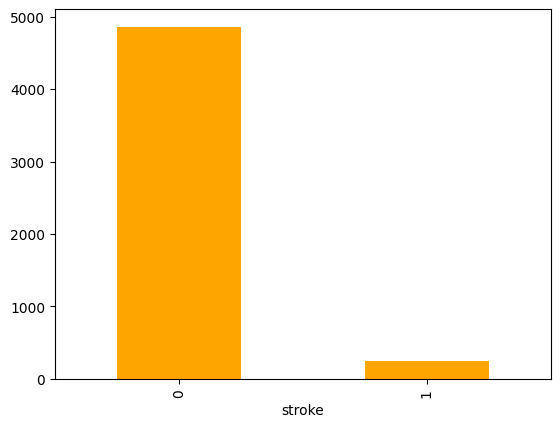

In [ ]:
df['stroke'].value_counts().plot(kind="bar",color='orange')

In [ ]:
print("% of people who actualy got a stroke : ",(df['stroke'].value_counts()[1]/df['stroke'].value_counts().sum()).round(3)*100)

% of people who actualy got a stroke :  4.9


In [ ]:
df['bmi'].isnull().sum()

201

<Axes: xlabel='bmi', ylabel='Count'>

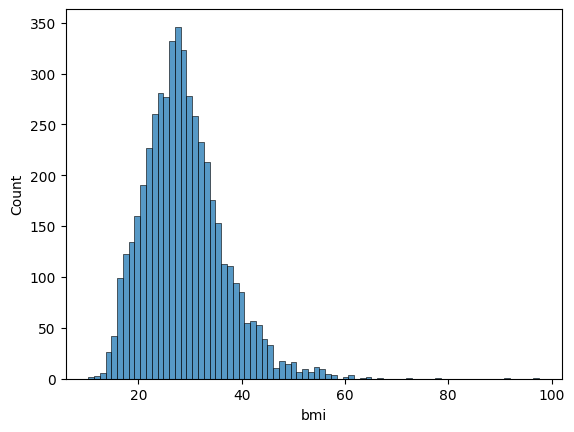

In [ ]:
sns.histplot(data=df['bmi'])

<Axes: ylabel='bmi'>

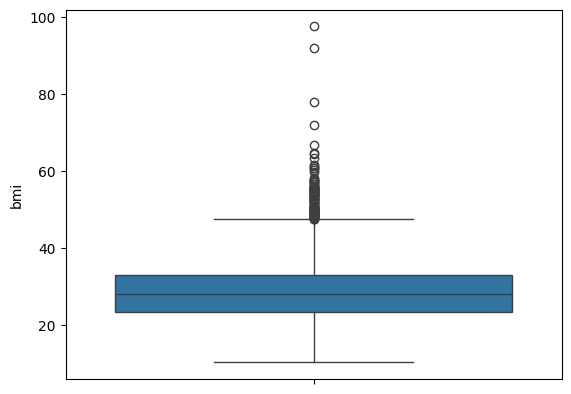

In [ ]:
sns.boxplot(data=df['bmi'])

In [ ]:
# Finding the count of outliers based on those instances which are out of iqr
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
# Finding IQR
IQR = Q3 - Q1
da=(df['bmi'] < (Q1 - 1.5 * IQR)) | (df['bmi'] > (Q3 + 1.5 * IQR))
da.value_counts()

,count
bmi,
False,5000
True,110


In [ ]:
df['bmi'].isna().sum()/len(df['bmi'])*100

3.9334637964774952

In [ ]:
df_na=df.loc[df['bmi'].isnull()]
g=df_na['stroke'].sum()
print("People who got stroke and their BMI is NA:",g)
h=df['stroke'].sum()
print("People who got stroke and their BMI is given:",h)
print("percentage of people with stroke in Nan values to the overall dataset:",g/h*100)

People who got stroke and their BMI is NA: 40
People who got stroke and their BMI is given: 249
percentage of people with stroke in Nan values to the overall dataset: 16.06425702811245


In [ ]:
# Percentage of instances who got stroke
df['stroke'].sum()/len(df)*100

4.87279843444227

In [ ]:
df_na=df.loc[df['bmi'].isnull()]
print("Nan BMI values where people have stroke:",df_na['stroke'].sum())
print("overall BMI values where people have stroke:",df['stroke'].sum())

Nan BMI values where people have stroke: 40
overall BMI values where people have stroke: 249


In [ ]:
# Imputing the missing N/A values using the median of bmi column
print("median of bmi",df['bmi'].median())
df['bmi']=df['bmi'].fillna(df['bmi'].median())

median of bmi 28.1


In [ ]:
df['bmi'].isnull().sum()

0

<Axes: xlabel='bmi', ylabel='Count'>

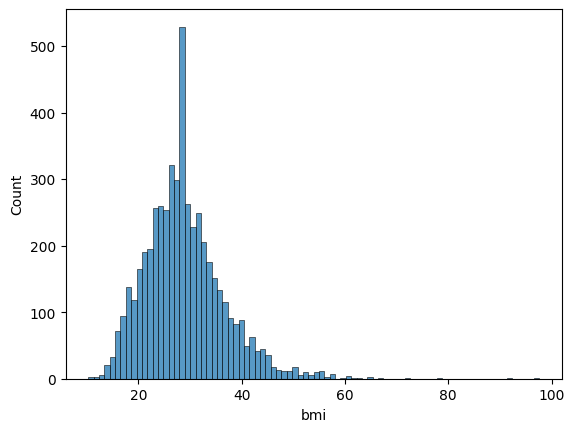

In [ ]:
sns.histplot(data=df['bmi'])

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

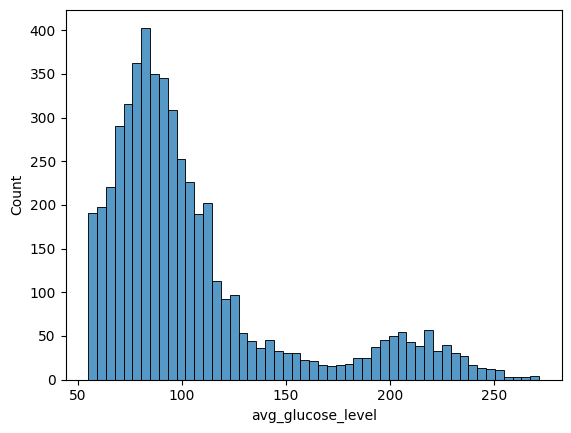

In [ ]:
sns.histplot(data=df['avg_glucose_level'])

<Axes: ylabel='avg_glucose_level'>

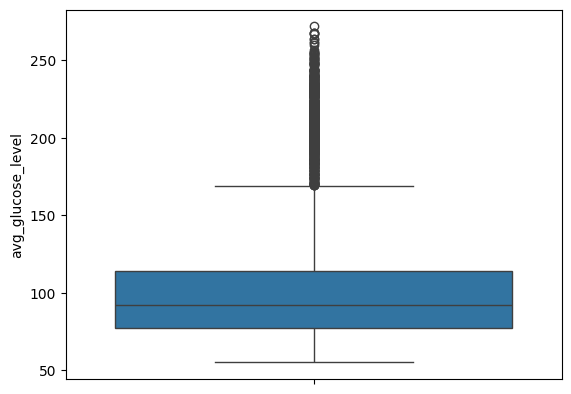

In [ ]:
sns.boxplot(data=df['avg_glucose_level'])

In [ ]:
Q1 = df['avg_glucose_level'].quantile(0.25)
Q3 = df['avg_glucose_level'].quantile(0.75)
IQR = Q3 - Q1
da=(df['avg_glucose_level'] < (Q1 - 1.5 * IQR)) | (df['avg_glucose_level'] > (Q3 + 1.5 * IQR))
da.value_counts()

,count
avg_glucose_level,
False,4483
True,627


In [ ]:
cols = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
cols.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.6
1,61.0,0,0,202.21,28.1
2,80.0,0,1,105.92,32.5
3,49.0,0,0,171.23,34.4
4,79.0,1,0,174.12,24.0


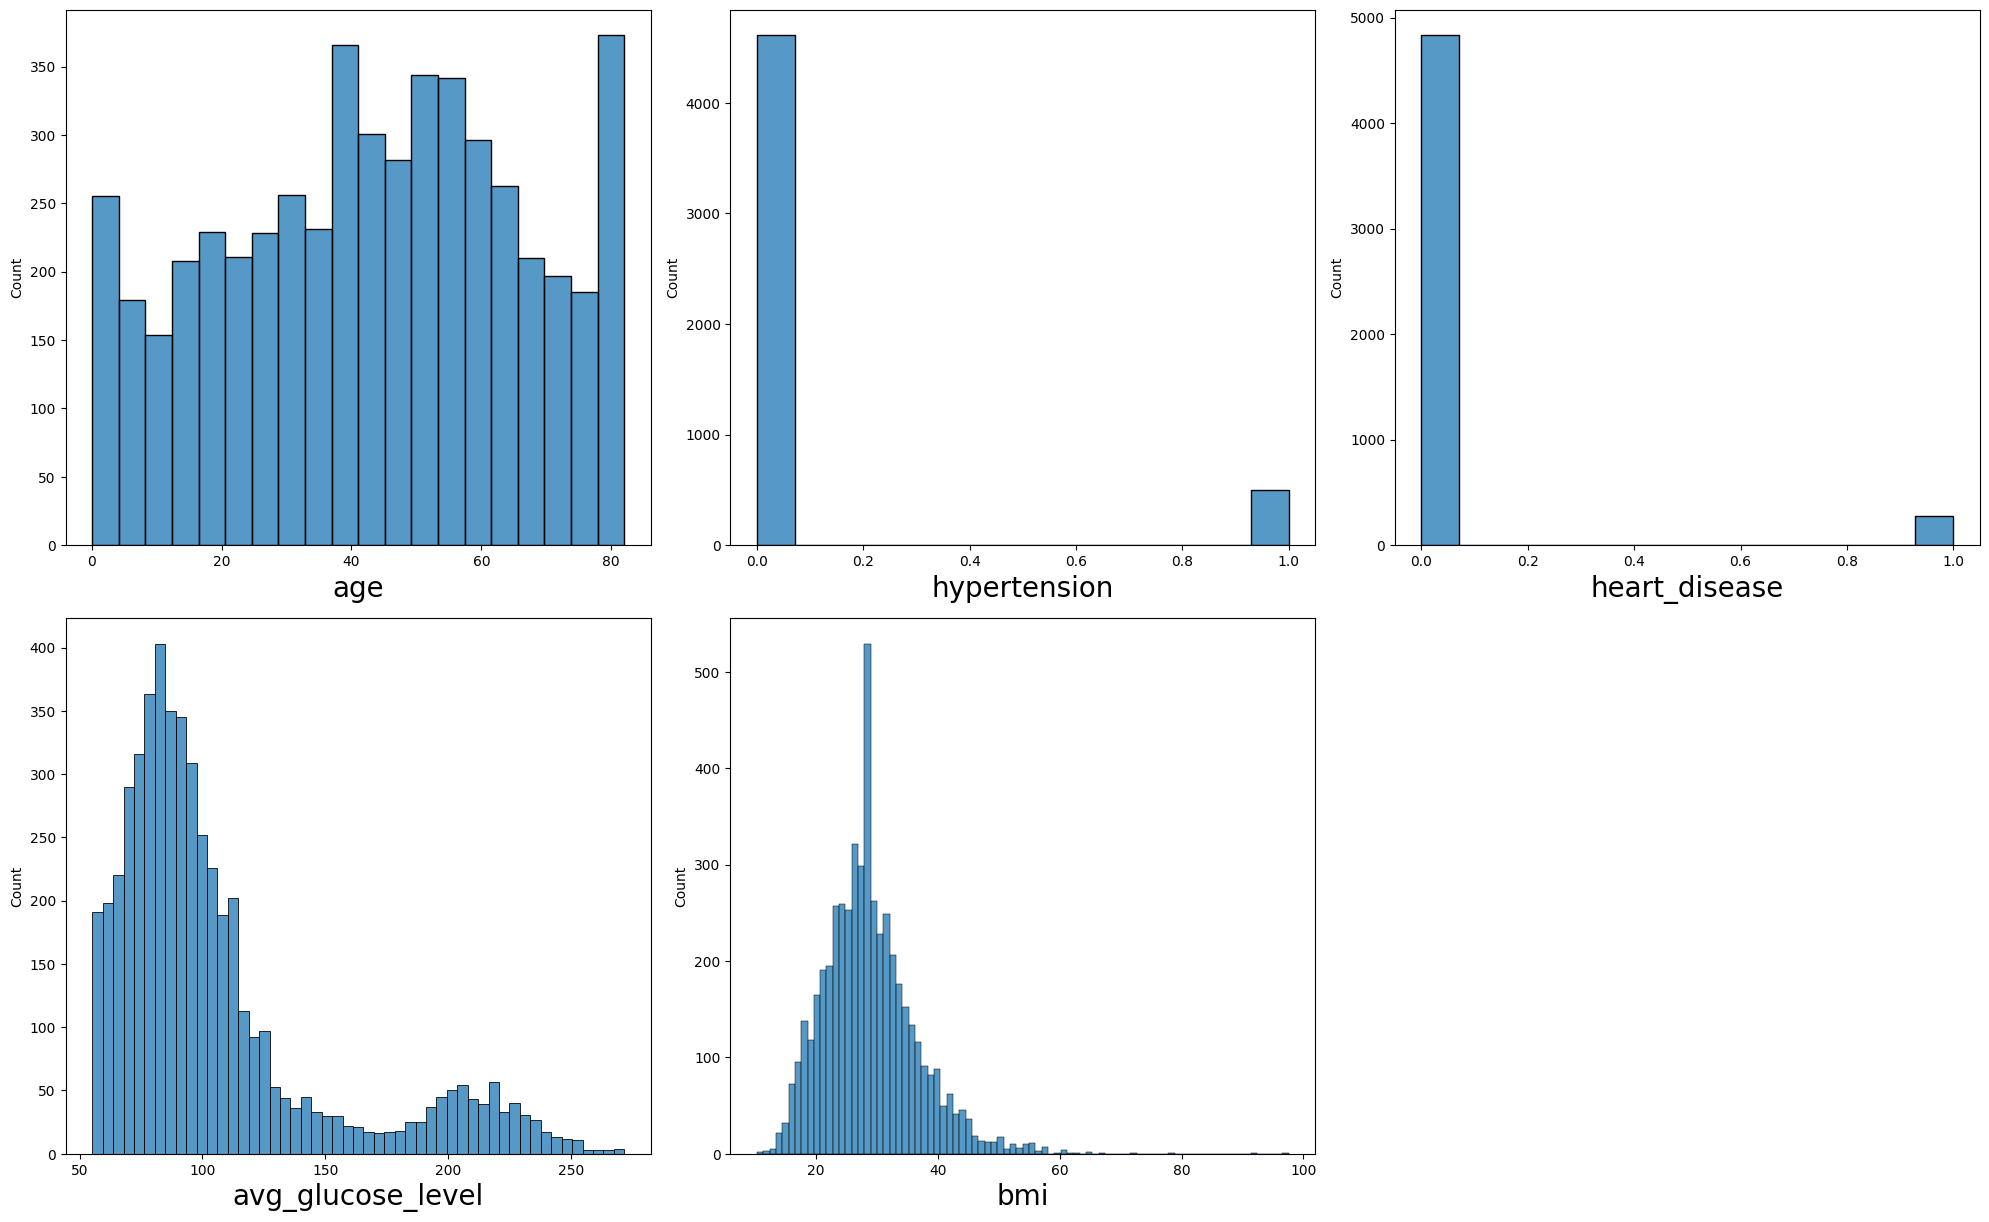

In [ ]:
cols.head()
# lets see how data is distributed for every column
import seaborn as sns
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.histplot(cols[column])
        plt.xlabel(column, fontsize=20)

    plotnumber+=1
plt.tight_layout()

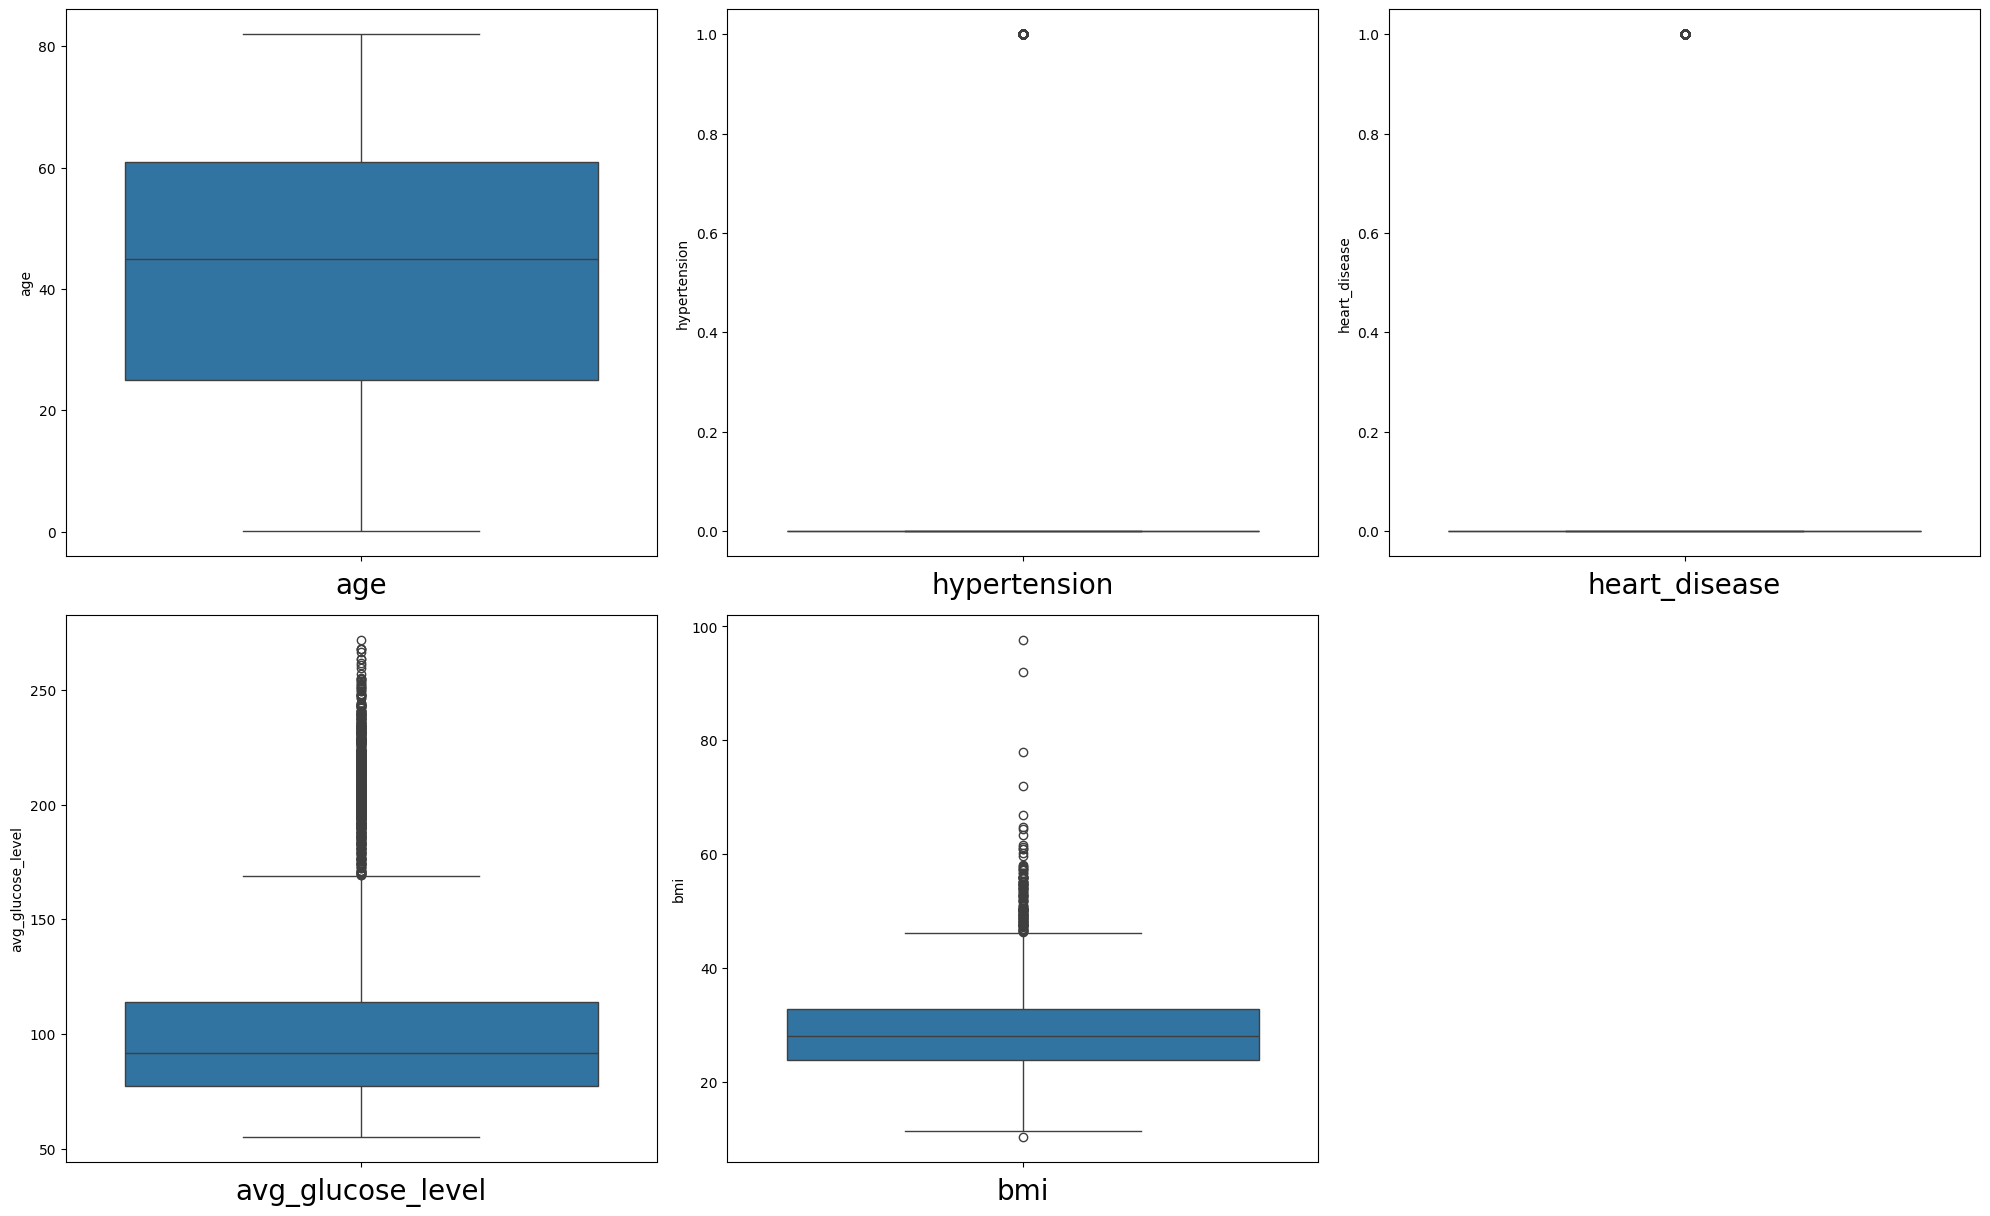

In [ ]:
# lets see outliers
import seaborn as sns
plt.figure(figsize=(20,30), facecolor='white')
plotnumber=1

for column in cols:
    if plotnumber<=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.boxplot(cols[column])
        plt.xlabel(column, fontsize=20)

    plotnumber+=1
plt.tight_layout()

<Axes: xlabel='stroke', ylabel='count'>

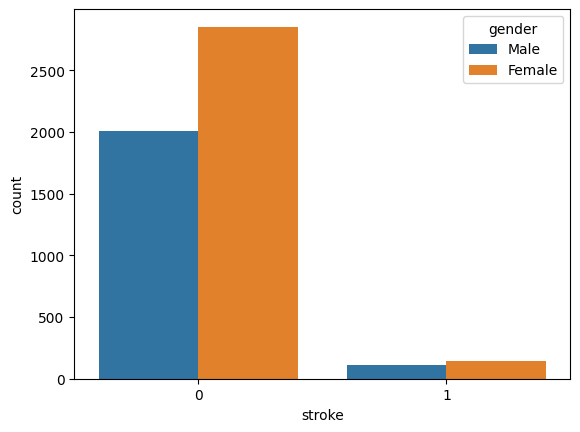

In [ ]:
# Comparing stroke with gender
sns.countplot(x='stroke', hue='gender', data=df)

<Axes: xlabel='stroke', ylabel='count'>

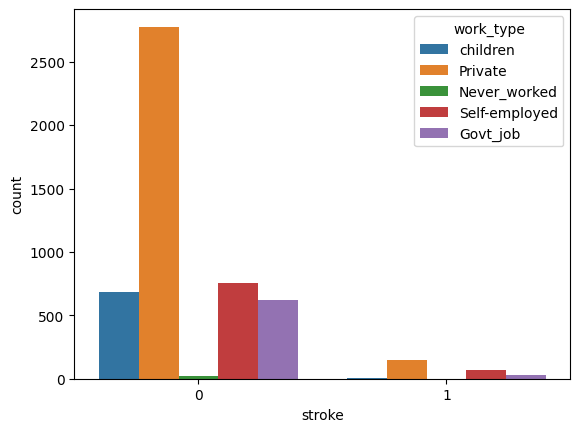

In [ ]:
# Comparing stroke with work-type
sns.countplot(x='stroke', hue='work_type', data=df)

<Axes: xlabel='stroke', ylabel='count'>

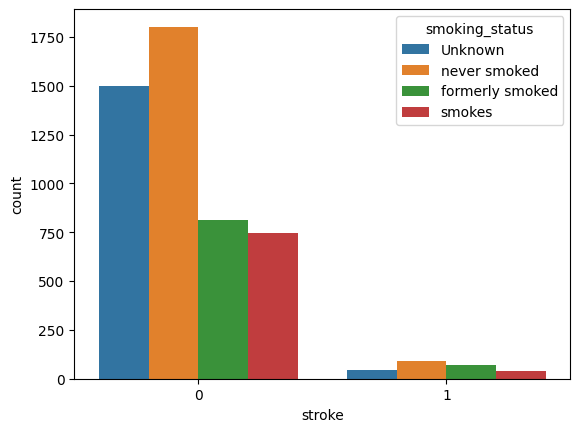

In [ ]:
# Comparing stroke with somking_status
sns.countplot(x='stroke', hue='smoking_status', data=df)

<Axes: xlabel='stroke', ylabel='count'>

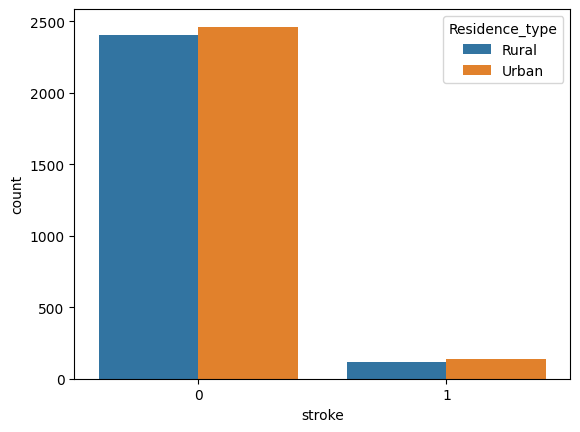

In [ ]:
# Comparing stroke with residence type
sns.countplot(x='stroke', hue='Residence_type', data=df)

<Axes: xlabel='stroke', ylabel='count'>

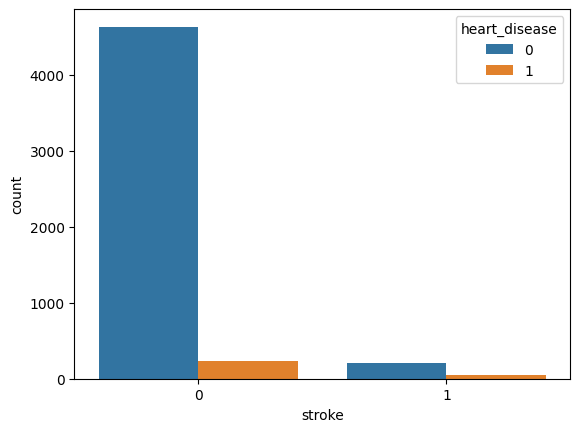

In [ ]:
# Comparing stroke with heart disease
sns.countplot(x='stroke', hue='heart_disease', data=df)

<Axes: xlabel='stroke', ylabel='count'>

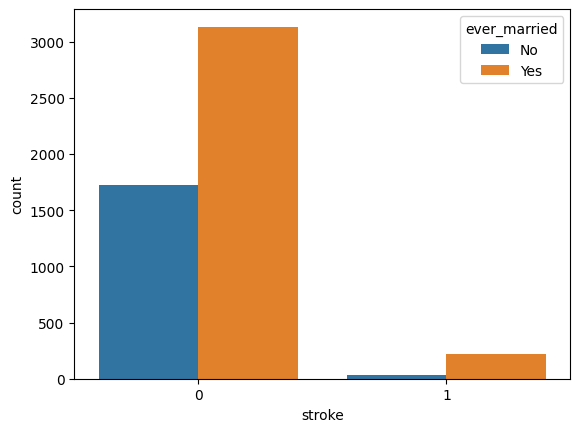

In [ ]:
# Comparing stroke with married status
sns.countplot(x='stroke', hue='ever_married', data=df)

<Axes: xlabel='stroke', ylabel='count'>

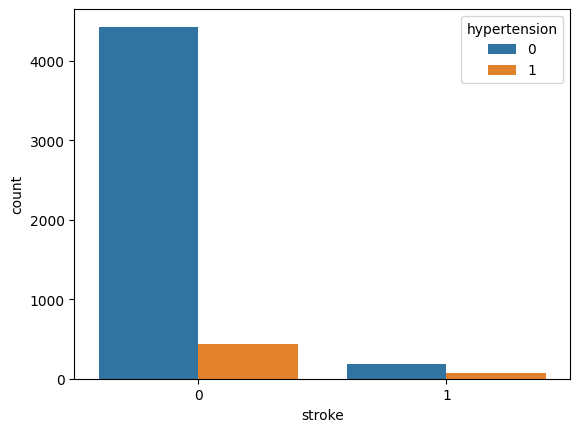

In [ ]:
# Comparing stroke with hypertension
sns.countplot(x='stroke', hue='hypertension', data=df)

In [ ]:
# Converting numeric-binary value attributes to string
df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype(str)
# Generating dummy attributes - one hot encoding format
df= pd.get_dummies(df, drop_first= True)

In [ ]:
df.head()

,id,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,9046,67.0,228.69,36.6,True,False,True,True,False,True,False,False,True,True,False,False,True
1,51676,61.0,202.21,28.1,False,False,False,True,False,False,True,False,False,False,True,False,True
2,31112,80.0,105.92,32.5,True,False,True,True,False,True,False,False,False,False,True,False,True
3,60182,49.0,171.23,34.4,False,False,False,True,False,True,False,False,True,False,False,True,True
4,1665,79.0,174.12,24.0,False,True,False,True,False,False,True,False,False,False,True,False,True


In [ ]:
df = df.drop(['id'],axis=1)  #dropping the id values from dataset

In [ ]:
df.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,67.0,228.69,36.6,True,False,True,True,False,True,False,False,True,True,False,False,True
1,61.0,202.21,28.1,False,False,False,True,False,False,True,False,False,False,True,False,True
2,80.0,105.92,32.5,True,False,True,True,False,True,False,False,False,False,True,False,True
3,49.0,171.23,34.4,False,False,False,True,False,True,False,False,True,False,False,True,True
4,79.0,174.12,24.0,False,True,False,True,False,False,True,False,False,False,True,False,True


In [ ]:
df.columns

Index(['age', 'avg_glucose_level', 'bmi', 'gender_Male', 'hypertension_1',
       'heart_disease_1', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes', 'stroke_1'],
      dtype='object')

In [ ]:
df.describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.862035
std,22.612647,45.283560,7.699562
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.800000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


**CORRELATION**

In [ ]:
df.corr()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
age,1.000000,0.238171,0.324296,-0.027623,0.276398,0.263796,0.679125,-0.078653,0.116534,0.327989,-0.634215,0.014180,0.236897,0.119307,0.073133,0.245257
avg_glucose_level,0.238171,1.000000,0.166876,0.054580,0.174474,0.161857,0.155068,-0.014675,0.016588,0.062694,-0.102250,-0.004946,0.068111,0.023885,0.017646,0.131945
bmi,0.324296,0.166876,1.000000,-0.026310,0.158293,0.036916,0.334911,-0.028327,0.203886,0.070160,-0.442102,-0.000277,0.103533,0.107636,0.084392,0.036110
gender_Male,-0.027623,0.054580,-0.026310,1.000000,0.021275,0.085717,-0.029936,0.011496,-0.032639,-0.025971,0.089283,-0.005937,0.042738,-0.098813,0.011477,0.009117
hypertension_1,0.276398,0.174474,0.158293,0.021275,1.000000,0.108306,0.164243,-0.021608,-0.005413,0.115442,-0.129506,-0.007913,0.058853,0.065063,0.031240,0.127904
heart_disease_1,0.263796,0.161857,0.036916,0.085717,0.108306,1.000000,0.114644,-0.015712,0.000027,0.086760,-0.091634,0.003092,0.066804,-0.021856,0.044049,0.134914
ever_married_Yes,0.679125,0.155068,0.334911,-0.029936,0.164243,0.114644,1.000000,-0.090838,0.153830,0.192716,-0.544441,0.006261,0.171256,0.102845,0.105226,0.108340
work_type_Never_worked,-0.078653,-0.014675,-0.028327,0.011496,-0.021608,-0.015712,-0.090838,1.000000,-0.076081,-0.028728,-0.025915,0.022859,-0.030095,0.036238,-0.028099,-0.014882
work_type_Private,0.116534,0.016588,0.203886,-0.032639,-0.005413,0.000027,0.153830,-0.076081,1.000000,-0.505475,-0.455992,-0.018173,0.025526,0.104860,0.100025,0.011888
work_type_Self-employed,0.327989,0.062694,0.070160,-0.025971,0.115442,0.086760,0.192716,-0.028728,-0.505475,1.000000,-0.172180,0.010594,0.093260,0.030668,-0.003626,0.062168


<Axes: >

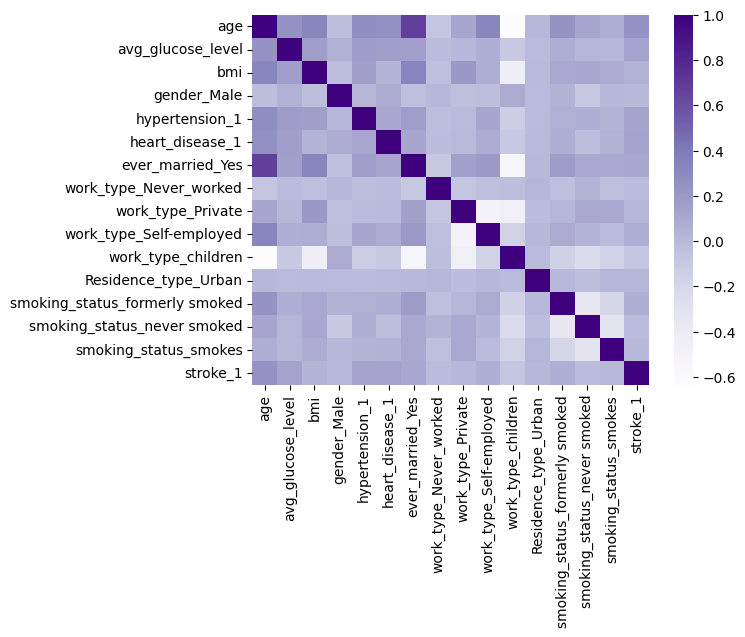

In [ ]:
custom_cmap = 'Purples'
sns.heatmap(df.corr(),cmap=custom_cmap)

In [ ]:
df.head()

,age,avg_glucose_level,bmi,gender_Male,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,67.0,228.69,36.6,True,False,True,True,False,True,False,False,True,True,False,False,True
1,61.0,202.21,28.1,False,False,False,True,False,False,True,False,False,False,True,False,True
2,80.0,105.92,32.5,True,False,True,True,False,True,False,False,False,False,True,False,True
3,49.0,171.23,34.4,False,False,False,True,False,True,False,False,True,False,False,True,True
4,79.0,174.12,24.0,False,True,False,True,False,False,True,False,False,False,True,False,True


In [ ]:
# Since our Dataset is highly undersampled (based on target instances) we are going to perform a over sampling method to have equal representation of both the target classes
# Using random oversampling - importing the library
from imblearn.over_sampling import RandomOverSampler

# Performing a minority oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['stroke_1'],axis=1)
y=df['stroke_1']

# Obtaining the oversampled dataframes - testing and training
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
# importing a scaling modeule
from sklearn.preprocessing import StandardScaler

# Since the numeric attributes in the dataset is in different ranges and three are outliers persent we are usign a scaler to get all the values into the same range.
s = StandardScaler()
# Scaling the numeric attributes
df[['bmi', 'avg_glucose_level', 'age']] = s.fit_transform(df[['bmi', 'avg_glucose_level', 'age']])

**SPLITTING THE DATASET INTO TRAINING AND TESTING**

In [ ]:
# creating dataset split for training and testing the model
from sklearn.model_selection import train_test_split
# Performing a 80-20 test-train split
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size= 0.20, random_state= 42)

In [ ]:
# Checking the size of the splits
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (7777, 15)
y_train: (7777,)
X_test: (1945, 15)
y_test: (1945,)


**USING ALGORITHMS**

Accuracy: 0.9794344473007712
ROC AUC Score: 0.9986804123711341


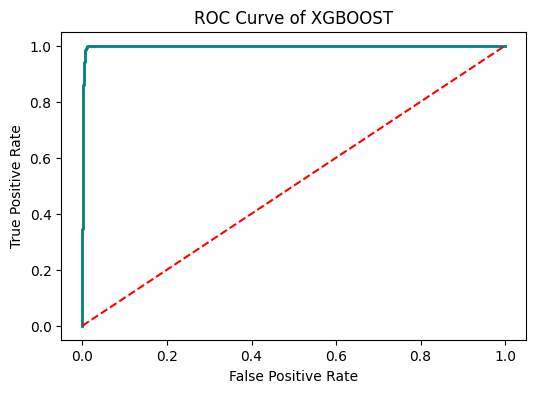

In [ ]:
#importing the XGBoost Classifier module
from xgboost  import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score

# Create the classifier object
xgb = XGBClassifier()
# Training the classifier
xgb.fit(X_train,y_train)
#predicting result using the test dataset
y_pred_xgb = xgb.predict(X_test)
y_pred_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Printing the accuracy and roc-auc score of the model
print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_xgb))

# plots of roc_auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve of XGBOOST')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [ ]:
# Printing the precision,recall,f1score and support values of the model based on the confusion matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy_score:",accuracy_score(y_test,y_pred_xgb))
print("Precision_score:",precision_score(y_test,y_pred_xgb))
print("Recall_score:",recall_score(y_test,y_pred_xgb))
print("f1_score:",f1_score(y_test,y_pred_xgb))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_xgb))

Accuracy_score: 0.9794344473007712
Precision_score: 0.9603960396039604
Recall_score: 1.0
f1_score: 0.9797979797979798
ROC AUC Score: 0.9986804123711341


In [ ]:
# Making sample predictions based on manual value entry
age=75
avg_glucose_level=300
bmi=36.6
gender_Male=1
ever_married_Yes=1
work_type_Never_worked=0
work_type_Private=1
work_type_Self_employed=0
work_type_children=0
Residence_type_Urban=1
smoking_status_formerly_smoked=1
smoking_status_never_smoked=0
smoking_status_smokes=0
hypertension_1=1
heart_disease_1=1
input_features = [age	,avg_glucose_level,	bmi	,gender_Male,hypertension_1,	heart_disease_1,ever_married_Yes,	work_type_Never_worked,	work_type_Private,	work_type_Self_employed,	work_type_children	,Residence_type_Urban,	smoking_status_formerly_smoked,smoking_status_never_smoked	,smoking_status_smokes]

features_value = [np.array(input_features)]
features_name = ['age'	,'avg_glucose_level',	'bmi'	,'gender_Male'	,'hypertension_1',	'heart_disease_1','ever_married_Yes',	'work_type_Never_worked',	'work_type_Private',	'work_type_Self-employed',	'work_type_children'	,'Residence_type_Urban',	'smoking_status_formerly smoked','smoking_status_never smoked'	,'smoking_status_smokes']

df = pd.DataFrame(features_value, columns=features_name)
prediction = xgb.predict(df)[0]
print(prediction)

1


In [ ]:
import pickle
with open('model_pickle.pkl','wb') as file:
    pickle.dump(xgb,file)